## Abstract 
El presente dataset, nos muestra los datos suministrados por el gerente de un banco, hay una preocupación por la cantidad de personas que cancelan su tarjeta de crédito, por lo que el principal objetivo es entender que personas son las mas propensas a cancelar su tarjeta de crédito, la base de datos consta de 10.000 clientes, compuesta por 21 columnas que contiene: 

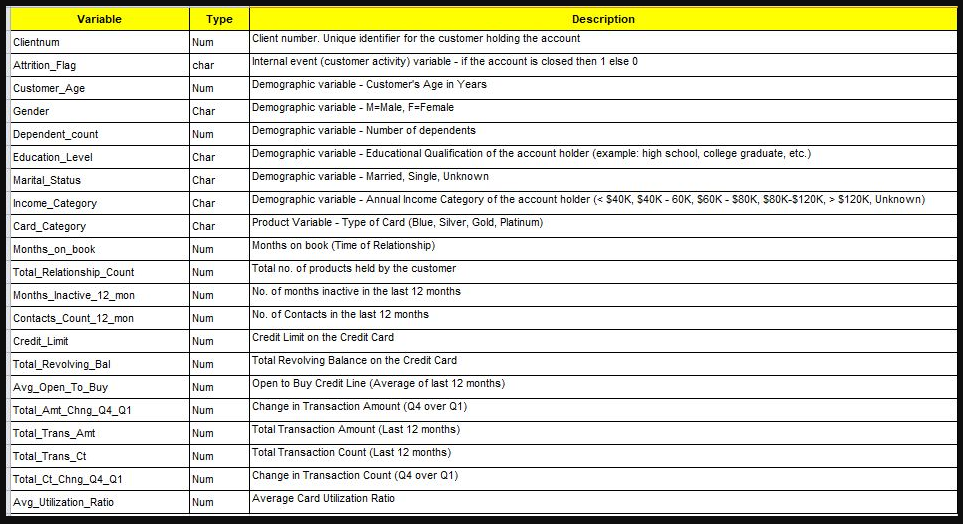

## Objetivo 
¿ Como podemos anticipar que un cliente va a cancelar la tarjeta de credito, para poder evitarlo?

## Contexto comercial
EL gerente de un banco esta preocupado con la cantidad de clientes que han dejado su servicio de tarjeta de credito. Nos ha contactado al equipo de data para poder predecir que cliente va a abandonar el servicio, para de esta forma poder ir proactivamente al consumidor para proveer mejores servicios y girar la decision de los clientes hacia otra direccion

## Opening the data set

In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
path=r"C:\Users\sebastian sossa\Documents\coderHouse\trabajo_final\data.csv"
old = pd.read_csv(path)
df = old.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1' ])
df.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


## EDA

In [3]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

Podemos evidenciar que el data set no presenta datos ausentes

In [4]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


Igualmente que los datos estan bien y no se presenta ningun error aparente de typo en el data set

In [5]:
df.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## Analisis 

([<matplotlib.patches.Wedge at 0x202ba2e78e0>,
 [Text(-0.5319254019667502, 0.9628371444551314, 'Attrition client'),
  Text(0.5319254019667501, -0.9628371444551314, 'Existing client')],
 [Text(-0.2901411283455001, 0.5251838969755261, '16.1 %'),
  Text(0.29014112834550004, -0.5251838969755261, '83.9 %')])

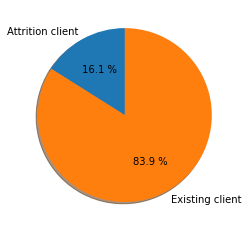

In [6]:
df.groupby('Attrition_Flag')['CLIENTNUM'].count()
attrition = (df[df['Attrition_Flag']=='Attrited Customer']['CLIENTNUM'].count()/df['CLIENTNUM'].count())*100
existing = (df[df['Attrition_Flag']=='Existing Customer']['CLIENTNUM'].count()/df['CLIENTNUM'].count())*100
data = [attrition, existing]
labeslsA = ['Attrition client', 'Existing client']
fig, ax = plt.subplots()
ax.pie(data, labels= labeslsA, startangle = 90, shadow=True, autopct="%0.1f %%")

Como podemos evidenciar solo el 16.1% de todos los clientes del dataset dejan la tarjeta de credito 


In [7]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

### Atritioned and existing by gender

C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_48788\211841535.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  femenine_attrited = df.loc[df['Gender']=='F'][df['Attrition_Flag']== 'Attrited Customer'].count()
C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_48788\211841535.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  femenine_existing = df.loc[df['Gender']=='F'][df['Attrition_Flag']== 'Existing Customer'].count()
C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_48788\211841535.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  masculine_attrited = df.loc[df['Gender']=='M'][df['Attrition_Flag']== 'Attrited Customer'].count()
C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_48788\211841535.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  masculine_existing = df.loc[df['Gender']=='M'][df['Attrition_Flag']== 'Existing Customer'

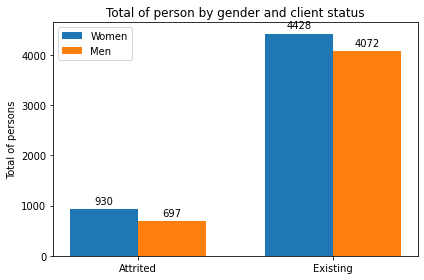

In [8]:
femenine_attrited = df.loc[df['Gender']=='F'][df['Attrition_Flag']== 'Attrited Customer'].count()
femenine_existing = df.loc[df['Gender']=='F'][df['Attrition_Flag']== 'Existing Customer'].count()

masculine_attrited = df.loc[df['Gender']=='M'][df['Attrition_Flag']== 'Attrited Customer'].count()
masculine_existing = df.loc[df['Gender']=='M'][df['Attrition_Flag']== 'Existing Customer'].count()


Femenine = [femenine_attrited['CLIENTNUM'], femenine_existing['CLIENTNUM'] ]
Masculine = [masculine_attrited['CLIENTNUM'], masculine_existing['CLIENTNUM']]

labels = ['Attrited', 'Existing']

x = np.arange(len(labels))  # the label locations

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Femenine, width, label='Women')
rects2 = ax.bar(x + width/2, Masculine, width, label='Men')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total of persons')
ax.set_title('Total of person by gender and client status')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

Como podemos observar, no hay una diferencia de generos en personas que dejan la tarjetas decredito, es mayor siempre en mujeres en los 2 casos 

([<matplotlib.patches.Wedge at 0x202ba0cb220>,
 [Text(-1.0722854917786389, -0.24536467578085255, 'F'),
  Text(1.072285491778639, 0.24536467578085194, 'M')],
 [Text(-0.5848829955156212, -0.13383527769864684, '57.2 %'),
  Text(0.5848829955156212, 0.1338352776986465, '42.8 %')])

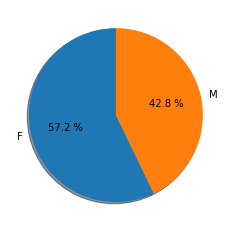

In [9]:
attrition = df[df['Attrition_Flag']=='Attrited Customer']
F = (attrition[attrition['Gender']=='F']['CLIENTNUM'].count())*100
M = (attrition[attrition['Gender']=='M']['CLIENTNUM'].count())*100
dataSex =[F, M]
labelSex= ['F', 'M']
fig, ax = plt.subplots()
ax.pie(dataSex, labels= labelSex, startangle = 90, shadow=True, autopct="%0.1f %%")

Para apoyar la hipotesis anterior en este caso podemos observar que la cantidad de mujeres es mayor en el dataset F= 57.2% M= 42.8%

### marital status 

[709, 3978, 668, 3275, 129, 620, 121, 627]


C:\Users\sebastian sossa\AppData\Local\Temp\ipykernel_48788\910014065.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  principal_lis.append(df.loc[df['Marital_Status']== v][df['Attrition_Flag']== c].count()['CLIENTNUM'])


<AxesSubplot:>

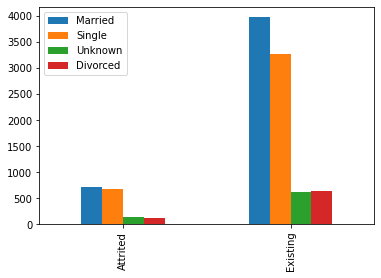

In [10]:
y_labels = ['Attrited Customer','Existing Customer' ]

x_labels =['Married', 'Single', 'Unknown', 'Divorced']


principal_lis = []


for v in x_labels:
    for c in y_labels:
        principal_lis.append(df.loc[df['Marital_Status']== v][df['Attrition_Flag']== c].count()['CLIENTNUM'])

attritioners = [principal_lis[0], principal_lis[2], principal_lis[4], principal_lis[6]]

existed = [principal_lis[1], principal_lis[3], principal_lis[5], principal_lis[7]]
print(principal_lis)



group_labels = ['Attrited', 'Existing']
groups = [attritioners, existed]

# Convert data to pandas DataFrame.
x_labels =['Married', 'Single', 'Unknown', 'Divorced']
df_plot= pd.DataFrame(groups, index=group_labels)
df_plot.rename(columns = {0:'Married', 1:'Single', 2:'Unknown', 3:'Divorced'}, inplace = True)
df_plot.plot.bar()


En este caso podemos ver que la mayoria de personas que dejan las tarjetas de credito, estan casadas, seguido por los solteros, pero es un mismo patron que se presenta en el dataset total 

[7.386195319443073, 46.28221585859583, 38.935518909844966, 7.3960699121161255]
[7.386195319443073, 7.3960699121161255, 38.935518909844966, 46.28221585859583]
Casados 7.39
Married 46.28
Single 38.94
Unknown 7.4


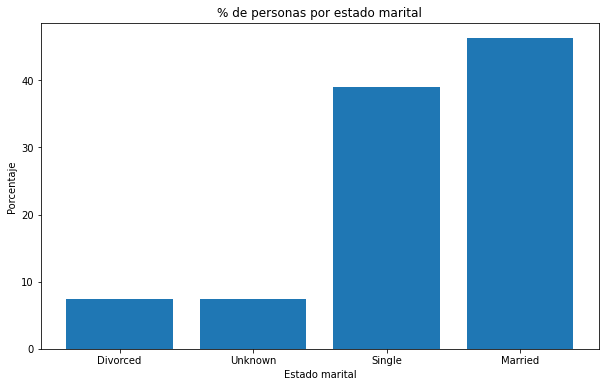

In [11]:
VarGender =  df.groupby('Marital_Status')['CLIENTNUM'].count()
Divorced = (df[df['Marital_Status']=='Divorced']['CLIENTNUM'].count()/df['CLIENTNUM'].count())*100
Married = (df[df['Marital_Status']=='Married']['CLIENTNUM'].count()/df['CLIENTNUM'].count())*100
Single = (df[df['Marital_Status']=='Single']['CLIENTNUM'].count()/df['CLIENTNUM'].count())*100
Unknown = (df[df['Marital_Status']=='Unknown']['CLIENTNUM'].count()/df['CLIENTNUM'].count())*100
dataMarital = [Divorced, Married, Single, Unknown ]
print(dataMarital)
dataMarital.sort()
print(dataMarital)
labelMartial = ['Divorced', 'Unknown', 'Single','Married' ]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(labelMartial, dataMarital, )
ax.set_title('% de personas por estado marital')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Estado marital')
print('Casados ' + str(Divorced.round(2)))
print('Married ' + str(Married.round(2)))
print('Single ' + str(Single.round(2)))
print('Unknown ' + str(Unknown.round(2)))

Como podemos evidenciar en la distribucion del data set total tambien se presenta el mismo patron

### Analisis de histplots por tipo de cliente 

In [12]:
attrition = df[df['Attrition_Flag']=='Attrited Customer']
attrition.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [13]:
existed = df[df['Attrition_Flag']=='Existing Customer']
existed.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


### Hisplots of attrited

2


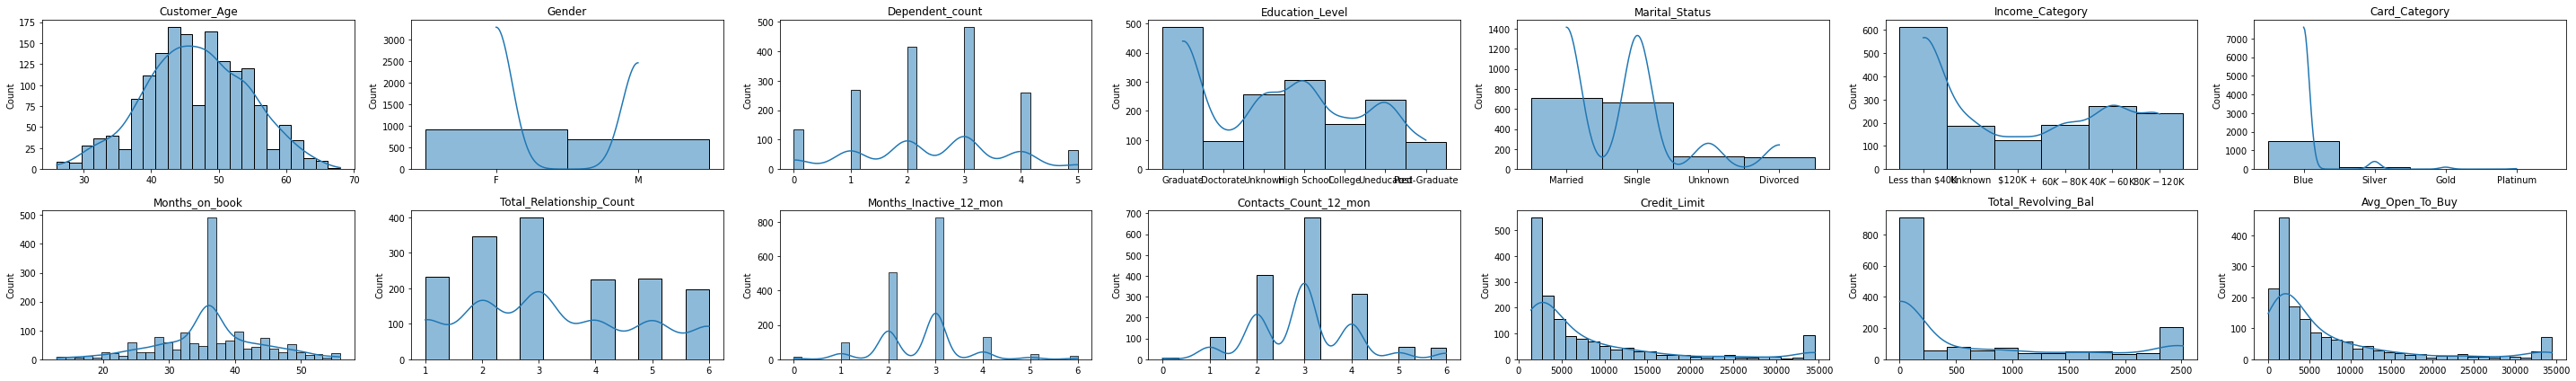

In [14]:
variables = ['Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit','Total_Revolving_Bal',
       'Avg_Open_To_Buy' ]

columns = 7
print(len(variables) //columns)
fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(40,6))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(attrition[variable], ax=axes[i][j], kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()
plt.show()

### Hisplots of existing

2


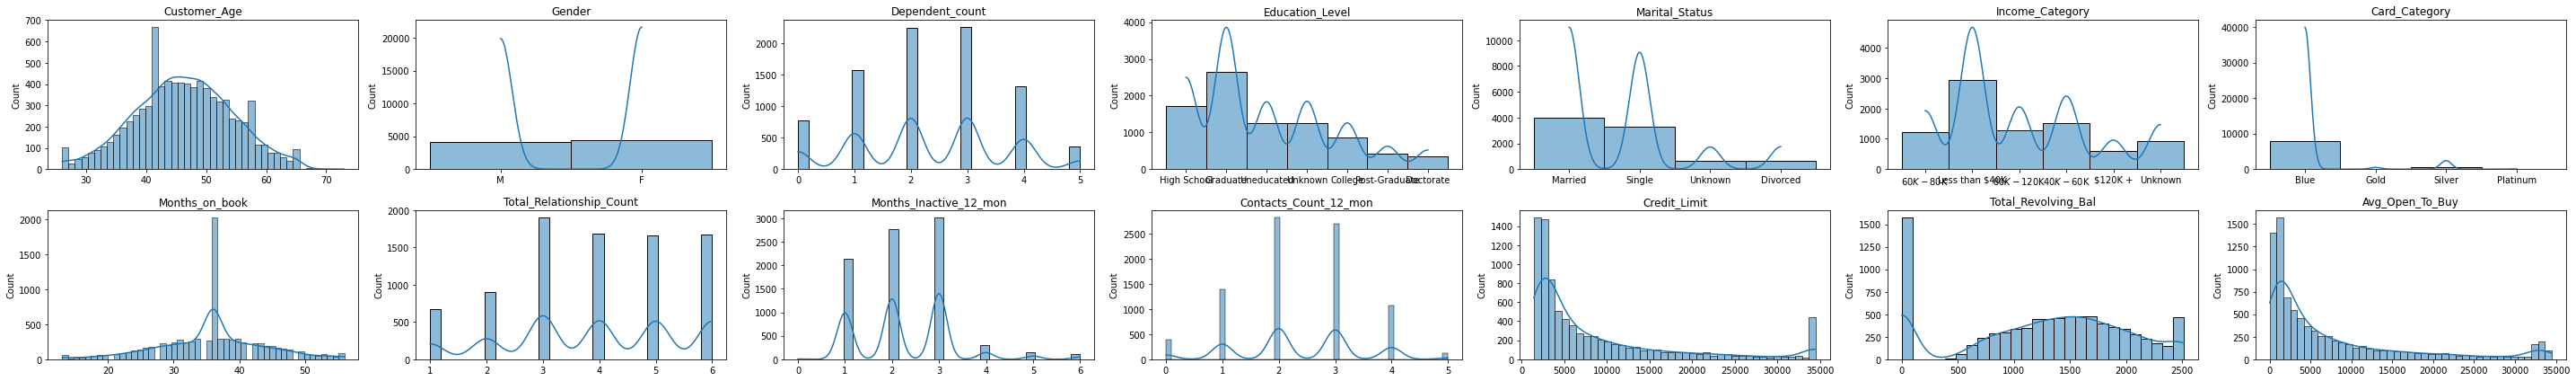

In [15]:
variables = ['Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit','Total_Revolving_Bal',
       'Avg_Open_To_Buy' ]

columns = 7
print(len(variables) //columns)
fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(40,6))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(existed[variable], ax=axes[i][j], kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")
    
plt.tight_layout()
plt.show()

No hay una diferencia siginificativa entre las distribuciones de los consumidores que cancelan la tarjeta de credito vs con los clientes existentes

### Mapa de correlacion

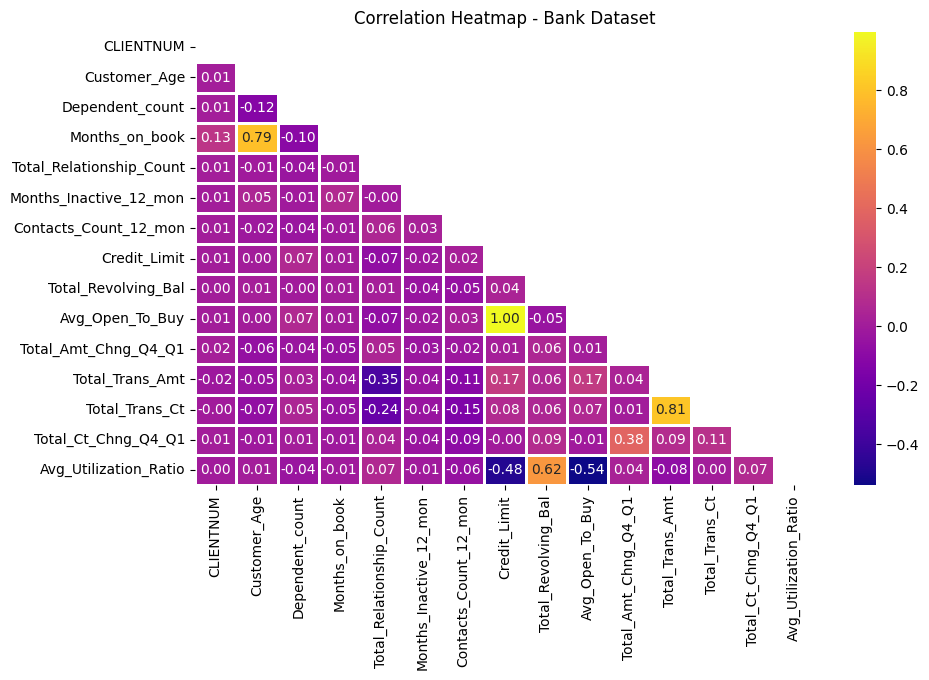

In [16]:
plt.figure(dpi = 100,figsize= (10,6))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap - Bank Dataset')
plt.show()

Las Correlaciones mas fuertes que podemos evidenciar son 
* **customer_age- months on books**  (0.79): Entre mas edad tiene una persona, mas cantidad de tiempo en el banco 
* **avg_open_to_buy - credit_limit** (1.00): El avg_open_to buy es la diferencia entre el credito asignado y el balance a 12 meses, por lo que esta directamente relacionado con el credit_limit
* **avg_utilitation_ratio - total_revolving_bal** (0.62): Total_revolveng_bal se refiere a la cantidad del credito rotativo revolvente del cliente, es decir la cantidad de dinero que el cliente debe sobre el total del credito,  esta directamente correlacionado con el avg_utilitation_ratio, que es el procentaje de utilizacion de la tarjeta de credito sobre el saldo total 
* **Total_trans_amt - total_trans_ct** (0.81): **Total_trans_amt** Total de las transacciones (monto), **total_trans_ct** total de las transacciones( cuenta), estan directamente relacionadas

In [17]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

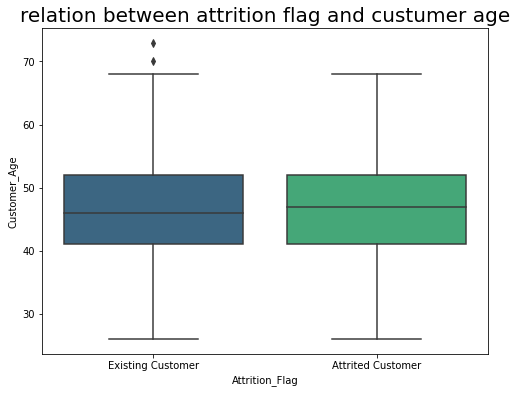

In [18]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Customer_Age', palette = 'viridis')
plt.title('relation between attrition flag and custumer age', fontsize = 20)
plt.show()

En los dos casos no hay diferencia notable en la edad 

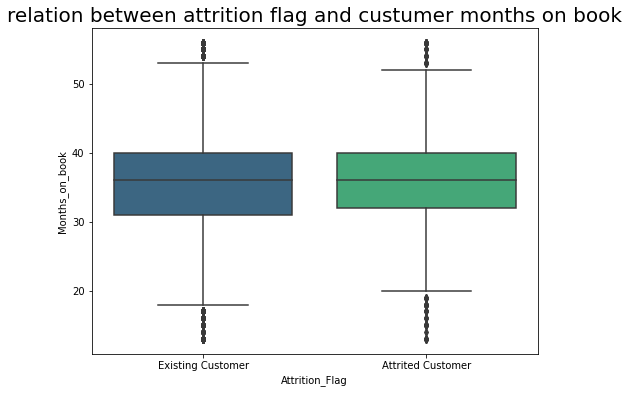

In [19]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Months_on_book', palette = 'viridis')
plt.title('relation between attrition flag and custumer months on book', fontsize = 20)
plt.show()

Notamos que no hay una diferencia notable en la cantidad de meses que el cliente tiene con la tarjeta de credito, excepto por la cantidad minima de meses que tiene el cliente existente que empieza por debajo de 20 y en el caso de los clientes que se retiran la cantidad minima empieza despues de 20 

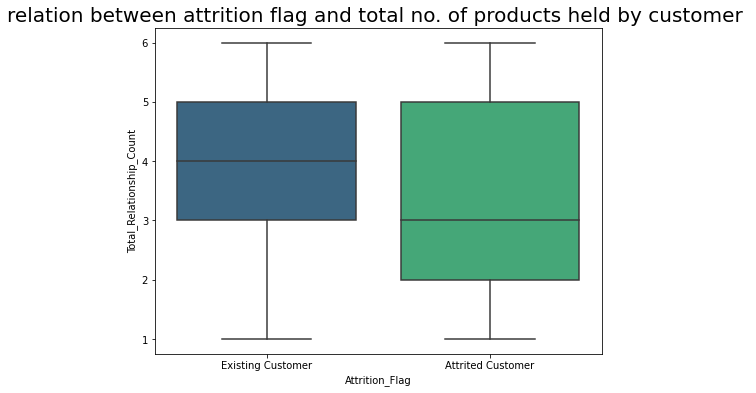

In [20]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Total_Relationship_Count', palette = 'viridis')
plt.title('relation between attrition flag and total no. of products held by customer ', fontsize = 20)
plt.show()

En este caso podemos evidenciar una gran diferencia entre los dos, en el caso de los clientes existentes podemos ver que a media de los productos que tiene es 4, por el contrario en el caso de los clientes que cancelan la tarjeta de credito, la media de productos es 3 

Attrition 2.693300553165335
Existed 2.273764705882353


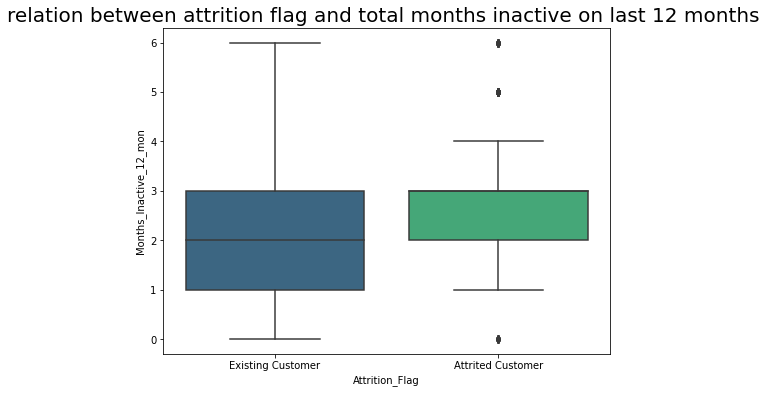

In [21]:
print('Attrition', str(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Months_Inactive_12_mon'].mean()))
print('Existed', str(df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Months_Inactive_12_mon'].mean()))
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Months_Inactive_12_mon', palette = 'viridis')
plt.title('relation between attrition flag and total months inactive on last 12 months ', fontsize = 20)
plt.show()


POdemos evidenciar una diferencia en la dispercion  de los datos, los clientes existentes tienen un mayor uso de su tarjeta ( ya que los valores minimos de uso son 0 meses), y un menor uso de su tarjeta (teniendo hasta 6 meses de desuso del producto), por otro lado, los clientes que cancelan su tarjeta no pasan de 4 meses de inactividad y tampoco tienen un gran uso del producto, ya que los valores minimos son de un mes de inactividad 

Attrition 2.972341733251383
Existed 2.3563529411764708


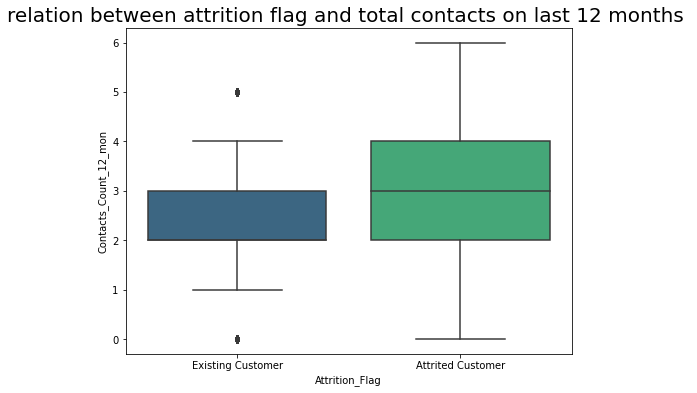

In [22]:
print('Attrition', str(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Contacts_Count_12_mon'].mean()))
print('Existed', str(df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Contacts_Count_12_mon'].mean()))
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Contacts_Count_12_mon', palette = 'viridis')
plt.title('relation between attrition flag and total contacts on last 12 months ', fontsize = 20)
plt.show()

Como podemos evidenciar los clientes que se retiran de la tarjeta de credito tiene una gran dispercion, los clientes attritted se contactan en promedio mas veces que los clientes existing, teniendo valores maximos de 6 contactos al mes a diferencia de los existed que tienen 4 llamadas maximas al mes, por otra parte los valores minimos tambien representan a los clientes que la cancelan, llegando a tener cero contactos al mes, por lo que se podria plantear que los clientes que cancelan la tarjeta pueden ser relacionados al servicio (muchos contactos) o clientes que no le dan uso al servicio 


    
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', ''],
      dtype='object')

Attrition 8136.039459127228
Existed 8726.877517647059


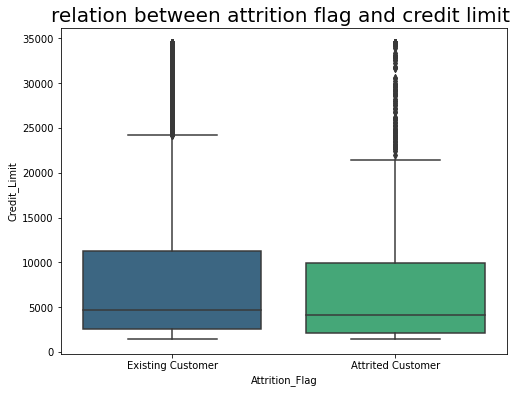

In [23]:
print('Attrition', str(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Credit_Limit'].mean()))
print('Existed', str(df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Credit_Limit'].mean()))
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Credit_Limit', palette = 'viridis')
plt.title('relation between attrition flag and credit limit ', fontsize = 20)
plt.show()

En general podemos observar que no hay mucha diferencia, sin embargo los clientes existentes tienen un mayor limite de credito

Attrition 672.8229870928088
Existed 1256.6041176470587


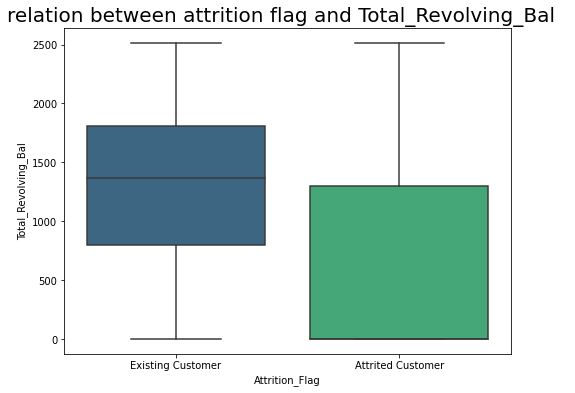

In [24]:
print('Attrition', str(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Total_Revolving_Bal'].mean()))
print('Existed', str(df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Total_Revolving_Bal'].mean()))
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Total_Revolving_Bal', palette = 'viridis')
plt.title('relation between attrition flag and Total_Revolving_Bal  ', fontsize = 20)
plt.show()

Aca vemos una gran diferencia en la cantidad de credito revolvente en los clientes existentes, la media es de 1256, mientras que en los clientes que dejan la tarjeta es de 672, se duplica la diferencia

Attrition 3095.025814382299
Existed 4654.655882352941


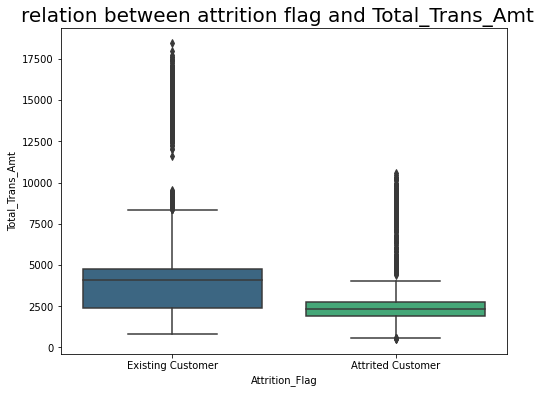

In [25]:

print('Attrition', str(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Total_Trans_Amt'].mean()))
print('Existed', str(df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Total_Trans_Amt'].mean()))
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Total_Trans_Amt', palette = 'viridis')
plt.title('relation between attrition flag and Total_Trans_Amt  ', fontsize = 20)
plt.show()


En este caso tambien tenemos una gran diferencia, ya que los clientes existentes realizan un mayor monto de transacciones, que los clientes que cancelan los productos, tienen una diferencia significante

Attrition 44.93362015980332
Existed 68.67258823529411


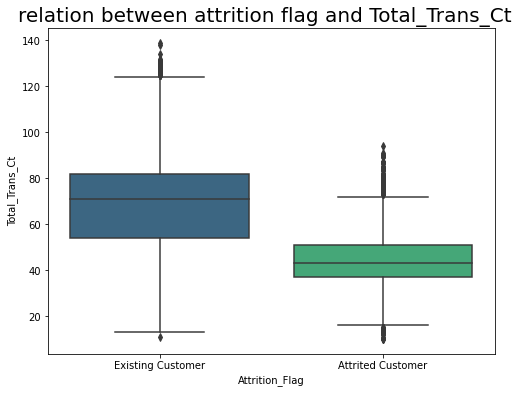

In [26]:
print('Attrition', str(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Total_Trans_Ct'].mean()))
print('Existed', str(df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Total_Trans_Ct'].mean()))
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Total_Trans_Ct', palette = 'viridis')
plt.title('relation between attrition flag and Total_Trans_Ct  ', fontsize = 20)
plt.show()

Como podemos evidenciar igual que en el caso anterior, los clientes existentes realizan una mayor cantidad de transacciones que los clientes que van a cancelar su producto, hay una gran diferencia entre los dos 

Attrition 0.16247510755992628
Existed 0.2964117647058824


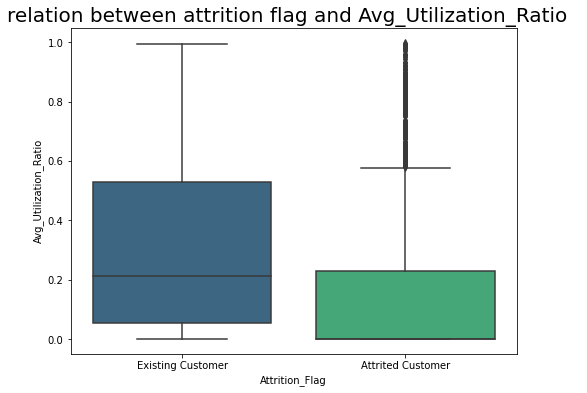

In [27]:
print('Attrition', str(df.loc[df['Attrition_Flag'] == 'Attrited Customer', 'Avg_Utilization_Ratio'].mean()))
print('Existed', str(df.loc[df['Attrition_Flag'] == 'Existing Customer', 'Avg_Utilization_Ratio'].mean()))
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(data = df, x='Attrition_Flag', y= 'Avg_Utilization_Ratio', palette = 'viridis')
plt.title('relation between attrition flag and Avg_Utilization_Ratio  ', fontsize = 20)
plt.show()

El Avg_Utilization_Ratio es el porcentaje de utilizacion del producto que tiene cada cliente, en el caso de los clientes existentes, hay un mayor ratio de utilizacion que en los clientes que cancelan su tarjeta

## Insights iniciales
Como podemos evidenciar las variables categoricas no son de gran peso en el caso de diferenciar a un cliente que va a cancelar la tarjeta de credito, por otro lado, al hacer el analisis con las variables cuntitativas, pudimos encontrar diferencias entre las dos categorias analizadas, es asi como el numero de contactos al banco puede ser mayor en las personas que se van a llegar a salir, la utilizacion del producto es significativa mente menor, el total de las transacciones, igualmente en el balance total revolvente la distribucion presenta un skewness positivo que tiende a cero, el limite de credito es relativamente menor y los clientes que van a cancelar la tarjeta tienden a tener menos productos activos con el banco  

## Splitting and normalizing the data 

In [28]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [41]:
y = df['Attrition_Flag']
x = df.drop(columns=['Attrition_Flag', 'CLIENTNUM', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category'])

In [55]:
# Conver the labels into 1 and 0, 1= Existing customer, 0 = Attrited customer
y = y.replace('Existing Customer', 0).replace('Attrited Customer', 1)

scaler1 = preprocessing.MinMaxScaler()
d1 = scaler1.fit_transform(x)
scaled_df1 = pd.DataFrame(d1, columns=x.columns)
scaled_df1.head(3)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0.404255,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061
1,0.489362,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105
2,0.531915,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000


### Splitting data

In [43]:
X_train, X_test,y_train, y_test = train_test_split(scaled_df1,y,
                                   random_state=42, 
                                   test_size=0.25)

In [44]:
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('--------------------------------')
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)


X_train shape : (7595, 14)
X_test shape : (2532, 14)
--------------------------------
y_train shape : (7595,)
y_test shape : (2532,)


## Logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score


In [46]:

lg1 = LogisticRegression(random_state=13, class_weight=None)

lg1.fit(X_train,y_train)

y_pred = lg1.predict(X_test)

print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.8937598736176935
Confusion Matrix: 
[[2055   58]
 [ 211  208]]
Area Under Curve: 0.7344854616325577
Recall score: 0.4964200477326969
Precision score: 0.7819548872180451


En este caso podriamos pensar que el modelo esta teneindo un buen rendimiento, pero al tener una base de datos inbalanceada (ya que los clientes existentes(0) representan el 83% del total) y lo que queremos es predecir con mas precision los clientes que van a cancelar la tarjeta de credito (1). La metrica que queremos mejorar es el area bajo la curva, y el recall, ya que queremos identificar el mayor numero de true positives dentro de nuestro dataset, que en este caso son los clientes que son mas propensos a cancelar la tarjeta de credito 

Para mejorar esto voy a usar un parametro dentro de logistic regression llamado class_weight

In [125]:
# define class weights
w = {0:10, 1:90}
# define model
lg2 = LogisticRegression(random_state=13, class_weight=w)
# fit it
lg2.fit(X_train,y_train)
# test
y_pred = lg2.predict(X_test)
# performance
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'Precision score: {precision_score(y_test,y_pred)}')

Accuracy Score: 0.7859399684044234
Confusion Matrix: 
[[1614  499]
 [  43  376]]
Area Under Curve: 0.8306087895480528
Recall score: 0.8973747016706444
Precision score: 0.4297142857142857


En este caso como lo que queremos predecir es cuando un cliente tiene mayor riesgo de cancelar la tarjeta de credito, nuestro modelo debe priorizar el recall, ya que queremos tener el maximo numero de true positives sobre false negatives y en este caso el modelo es muy bueno con la metrica del recall

## Decsion tree

In [122]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import sklearn

### Class imbalance parameter

In [127]:
# grid search class weights with decision tree for imbalance classification
from numpy import mean
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}, {0:10, 1:90}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.887744 using {'class_weight': {0: 10, 1: 1}}
0.885685 (0.017692) with: {'class_weight': {0: 100, 1: 1}}
0.887744 (0.018313) with: {'class_weight': {0: 10, 1: 1}}
0.882726 (0.017490) with: {'class_weight': {0: 1, 1: 1}}
0.876730 (0.018769) with: {'class_weight': {0: 1, 1: 10}}
0.853527 (0.025038) with: {'class_weight': {0: 1, 1: 100}}
0.873375 (0.018198) with: {'class_weight': {0: 10, 1: 90}}


### Modeling

In [130]:
tree_model = DecisionTreeClassifier(class_weight={0: 10, 1: 1})
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 10, 1: 1})

In [128]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [134]:
y_pred_tree = tree_model.predict(X_test)


print(f'Accuracy Score: {accuracy_score(y_test,y_pred_tree)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred_tree)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_pred_tree)}')
print(f'Recall score: {recall_score(y_test,y_pred_tree)}')
print(f'Precision score: {precision_score(y_test,y_pred_tree)}')

Accuracy Score: 0.9352290679304898
Confusion Matrix: 
[[2025   88]
 [  76  343]]
Area Under Curve: 0.8884844021609606
Recall score: 0.8186157517899761
Precision score: 0.7958236658932715


Con el decision tree, logramos un mejor puntaje global, con un mejor Area under curve, pero al mismo tiempo el recall  (que es lo que nos interesa), bajo de 89% a 81%

## Logistic regression with categorical data
En este caso vamos a realizar una prueba con todos los datos del dataset (incluyendo los datos categoricos), para evidenciar de que forma se ve afectado los resultados del modelo de regresion logitica

## Encoding categorical data

In [73]:
for i in ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category']:
    print(i, df[i].unique())

Gender ['M' 'F']
Education_Level [2 4 1 0 3 5 6]
Marital_Status ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category [3 1 4 2 5 0]
Card_Category ['Blue' 'Gold' 'Silver' 'Platinum']


### label encoding

In [70]:
df['Income_Category'] = df['Income_Category'].replace('Unknown',0).replace('Less than $40K',1).replace('$40K - $60K', 2).replace(
'$60K - $80K', 3).replace('$80K - $120K', 4).replace('$120K +', 5)

df['Education_Level'] = df['Education_Level'].replace('Unknown', 0).replace('Uneducated', 1).replace('High School', 2).replace('College', 3).replace('Graduate', 
4).replace('Post-Graduate', 5).replace('Doctorate', 6)

### One-hot encoding

In [111]:
transformed_gender = pd.get_dummies(df['Gender'], prefix=['Gender'])
transformed_Marital_Status = pd.get_dummies(df['Marital_Status'], prefix=['Marital'])
transformed_Card_Category = pd.get_dummies(df['Card_Category'], prefix=['card'])

data_transformed = pd.concat([df, transformed_gender, transformed_Marital_Status, transformed_Card_Category], axis=1)
data_transformed =data_transformed.drop(columns=['Gender', 'Marital_Status', 'Card_Category', 'CLIENTNUM'])
data_transformed.head(2)

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,['Gender']_F,['Gender']_M,['Marital']_Divorced,['Marital']_Married,['Marital']_Single,['Marital']_Unknown,['card']_Blue,['card']_Gold,['card']_Platinum,['card']_Silver
0,Existing Customer,45,3,2,3,39,5,1,3,12691.0,...,0,1,0,1,0,0,1,0,0,0
1,Existing Customer,49,5,4,1,44,6,1,2,8256.0,...,1,0,0,0,1,0,1,0,0,0


In [112]:
y2 = data_transformed['Attrition_Flag']
x2 = data_transformed.drop(columns=['Attrition_Flag'])

In [114]:
# Conver the labels into 1 and 0, 1= Existing customer, 0 = Attrited customer
y2 = y2.replace('Existing Customer', 0).replace('Attrited Customer', 1)

scaler2 = preprocessing.MinMaxScaler()
d2 = scaler2.fit_transform(x2)
scaled_df2 = pd.DataFrame(d2, columns=x2.columns)
scaled_df2.head(3)

,Customer_Age,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,['Gender']_F,['Gender']_M,['Marital']_Divorced,['Marital']_Married,['Marital']_Single,['Marital']_Unknown,['card']_Blue,['card']_Gold,['card']_Platinum,['card']_Silver
0,0.404255,0.6,0.333333,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.489362,1.0,0.666667,0.2,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.531915,0.6,0.666667,0.8,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [116]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_df2, y2,
                                   random_state=42, 
                                   test_size=0.25)

In [118]:
# define class weights
w = {0:10, 1:90}
# define model
logist = LogisticRegression(random_state=13, class_weight=w, max_iter=100)
# fit it
logist.fit(X_train2,y_train2)
# test
y_pred2 = logist.predict(X_test2)
# performance
print(f'Accuracy Score: {accuracy_score(y_test2, y_pred2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test2, y_pred2)}')
print(f'Area Under Curve: {roc_auc_score(y_test2, y_pred2)}')
print(f'Recall score: {recall_score(y_test2,y_pred2)}')
print(f'Precision score: {precision_score(y_test2,y_pred2)}')

Accuracy Score: 0.7875197472353871
Confusion Matrix: 
[[1616  497]
 [  41  378]]
Area Under Curve: 0.833468685159604
Recall score: 0.9021479713603818
Precision score: 0.432


c:\Users\sebastian sossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree clasifier with categorical data

In [136]:
tree_model = DecisionTreeClassifier(class_weight={0: 10, 1: 1})
tree_model.fit(X_train2,y_train2)

y_pred_tree2 = tree_model.predict(X_test2)


print(f'Accuracy Score: {accuracy_score(y_test2,y_pred_tree2)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test2, y_pred_tree2)}')
print(f'Area Under Curve: {roc_auc_score(y_test2, y_pred_tree2)}')
print(f'Recall score: {recall_score(y_test2,y_pred_tree2)}')
print(f'Precision score: {precision_score(y_test2,y_pred_tree2)}')

Accuracy Score: 0.9324644549763034
Confusion Matrix: 
[[2021   92]
 [  79  340]]
Area Under Curve: 0.8839579283602926
Recall score: 0.8114558472553699
Precision score: 0.7870370370370371


<AxesSubplot:xlabel='Importancia', ylabel='Variable'>

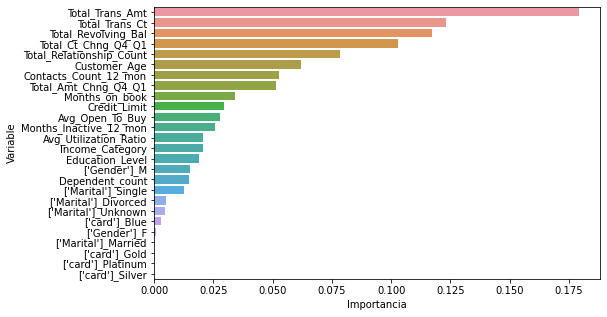

In [138]:
df_importancia = pd.DataFrame({'Variable': X_train2.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

df_importancia
plt.figure(figsize=(8,5))
sns.barplot(y = df_importancia['Variable'], x = df_importancia['Importancia'])

## Conclusion dataset con variables categoricas VS sin variables categoricas

Podemos evidenciar que usando las variables categoricas en el modelo de decision tree y logistic regression, no aumenta significativamente las metricas que nos interesa monitorear, por lo tanto vamos a eliminar estas variables y nos vamos a quedar con el modelo inicial 

## Conclusion decision tree vs logistic regression

Usar el decision tree es una mejor opcion ya que incrementa la metrica de area under the curve, que es la metrica que necesitamos mas alta, con un recall mas bajo que el de logistic regression (por 8 puntos porcentuales) pero una precision casi el doble de alta